In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, _ = plt.subplots()
type(fig)

matplotlib.figure.Figure

In [2]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3116: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3122: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


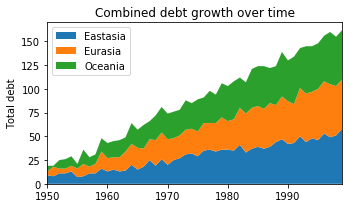

In [3]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

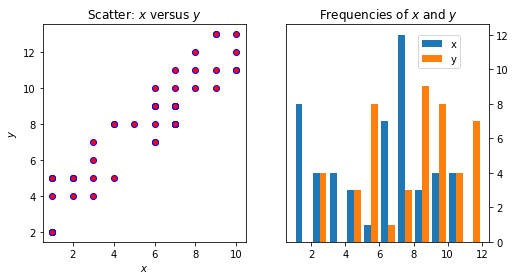

In [4]:
x = np.random.randint(low=1, high=11, size=50)
>>> y = x + np.random.randint(1, 5, size=x.size)
>>> data = np.column_stack((x, y))

>>> fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
...                                figsize=(8, 4))

>>> ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
>>> ax1.set_title('Scatter: $x$ versus $y$')
>>> ax1.set_xlabel('$x$')
>>> ax1.set_ylabel('$y$')

>>> ax2.hist(data, bins=np.arange(data.min(), data.max()),
...          label=('x', 'y'))
>>> ax2.legend(loc=(0.65, 0.8))
>>> ax2.set_title('Frequencies of $x$ and $y$')
>>> ax2.yaxis.tick_right()

In [5]:
(fig.axes[0] is ax1, fig.axes[1] is ax2)

(True, True)

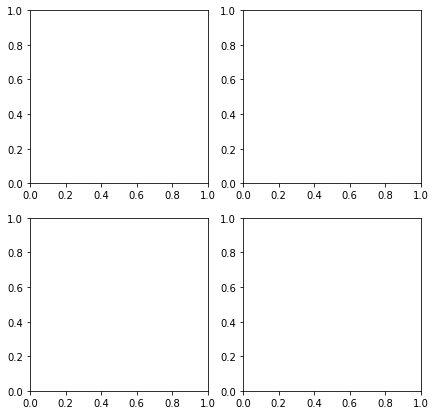

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

In [7]:
type(ax)

numpy.ndarray

In [8]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB344B6080>,
      dtype=object)

In [9]:
ax.shape

(2, 2)

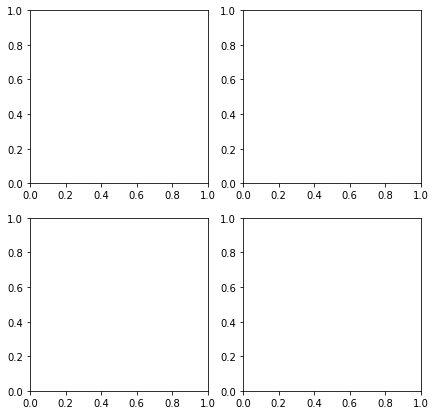

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
>>> ax1, ax2, ax3, ax4 = ax.flatten()

In [13]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
     housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [14]:
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

In [15]:
>>> def add_titlebox(ax, text):
...     ax.text(.55, .8, text,
...         horizontalalignment='center',
...         transform=ax.transAxes,
...         bbox=dict(facecolor='white', alpha=0.6),
...         fontsize=12.5)
...     return ax

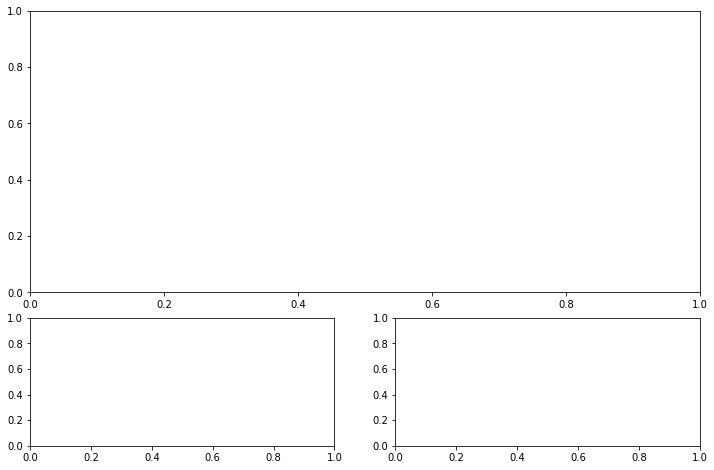

In [16]:
>>> gridsize = (3, 2)
>>> fig = plt.figure(figsize=(12, 8))
>>> ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
>>> ax2 = plt.subplot2grid(gridsize, (2, 0))
>>> ax3 = plt.subplot2grid(gridsize, (2, 1))

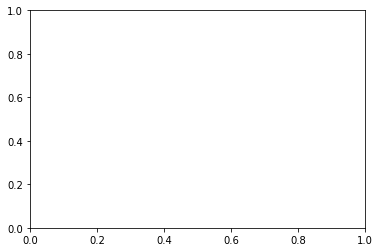

In [17]:
>>> ax1.set_title('Home value as a function of home age & area population',
...               fontsize=14)
>>> sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
>>> plt.colorbar(sctr, ax=ax1, format='$%d')
>>> ax1.set_yscale('log')
>>> ax2.hist(age, bins='auto')
>>> ax3.hist(pop, bins='auto', log=True)

>>> add_titlebox(ax2, 'Histogram: home age')
>>> add_titlebox(ax3, 'Histogram: area population (log scl.)')

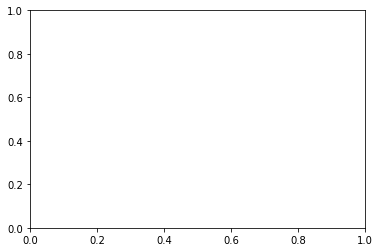

In [20]:
fig1, ax1 = plt.subplots()


In [21]:
id(fig1)

2040991353040

In [22]:
id(plt.gcf())

2040987964528

<Figure size 432x288 with 0 Axes>

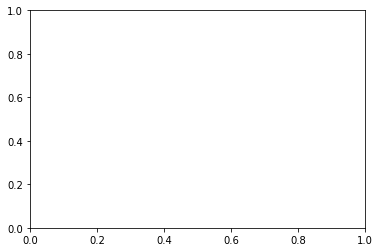

In [23]:
fig2, ax2 = plt.subplots()

In [24]:
id(fig2) == id(plt.gcf())

False

<Figure size 432x288 with 0 Axes>

In [25]:
plt.get_fignums()

[]

In [26]:
def get_all_figures():
...    return [plt.figure(i) for i in plt.get_fignums()]

In [27]:
get_all_figures()

[]

In [28]:
plt.close('all')

In [29]:
>>> x = np.diag(np.arange(2, 12))[::-1]
>>> x[np.diag_indices_from(x[::-1])] = np.arange(2, 12)
>>> x2 = np.arange(x.size).reshape(x.shape)

In [30]:
>>> sides = ('left', 'right', 'top', 'bottom')
>>> nolabels = {s: False for s in sides}
>>> nolabels.update({'label%s' % s: False for s in sides})
>>> print(nolabels)

{'left': False, 'right': False, 'top': False, 'bottom': False, 'labelleft': False, 'labelright': False, 'labeltop': False, 'labelbottom': False}


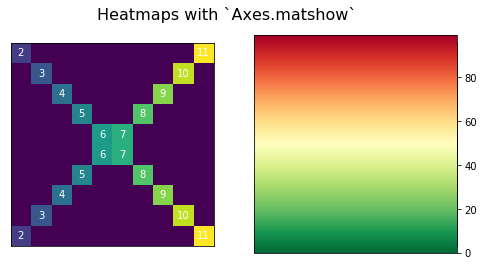

In [31]:
>>> from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

>>> with plt.rc_context(rc={'axes.grid': False}):
...     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
...     ax1.matshow(x)
...     img2 = ax2.matshow(x2, cmap='RdYlGn_r')
...     for ax in (ax1, ax2):
...         ax.tick_params(axis='both', which='both', **nolabels)
...     for i, j in zip(*x.nonzero()):
...         ax1.text(j, i, x[i, j], color='white', ha='center', va='center')
...
...     divider = make_axes_locatable(ax2)
...     cax = divider.append_axes("right", size='5%', pad=0)
...     plt.colorbar(img2, cax=cax, ax=[ax1, ax2])
...     fig.suptitle('Heatmaps with `Axes.matshow`', fontsize=16)